In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt

import sarpy as sp
from sarpy.datasets import load_mpeg7

In [2]:
# Loading dataset
dataset = load_mpeg7()
# Selecting all images of class '0'
bitmaps = [bitmap for i, bitmap in enumerate(dataset['bitmaps']) if dataset['targets'][i] == 0]
# Normalizing images
image_size_height = image_size_width = 400
bitmaps = [bitmap.normalize(image_size_height,image_size_width) for bitmap in bitmaps]

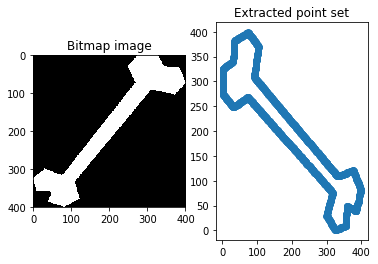

In [3]:
# Converting loaded bitmaps to point sets
point_sets = [bitmap.to_pointSet() for bitmap in bitmaps]

# Visualizing two examples to show that we loaded and converted properly
plt.subplot(121)
plt.imshow(bitmaps[0], cmap='gray')
plt.title("Bitmap image")

plt.subplot(122)
plt.scatter(point_sets[0].data[:,0], point_sets[0].data[:,1])
plt.title("Extracted point set")

plt.show()

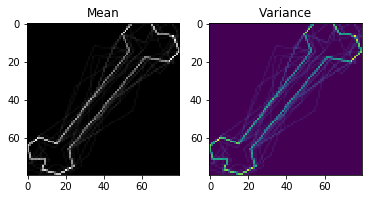

In [4]:
# Preparing mean/variance grid
bins = 80 # Number of bins in the grid per axis
bin_size = (image_size_height/bins, image_size_width/bins) # Size of each bin

# preparing grids
mean = np.zeros((bins, bins))
variance = np.zeros((bins,bins))

# we will need the total of points in the sets to compute mean and variance 
point_total = sum([len(point_set.data) for point_set in point_sets])

# Filling the mean grid with each point set
for point_set in point_sets:
    for point in point_set:
        x,y = point # Getting coordinates of the point
        mean[int(x/bin_size[0]), int(y/bin_size[1])] += 1 # Adding this point to the proper bin
# Dividing all bins by the total of points available
mean = mean / point_total

# Filling the variance grid with each point set
for point_set in point_sets:
    for point in point_set:
        x,y = point # Getting coordinates of the point
        variance[int(x/bin_size[0]), int(y/bin_size[1])] += (1 - mean[int(x/bin_size[0]), int(y/bin_size[1])]) ** 2 # Adding this point to the proper bin
# Dividing all bins by the total of points available
variance = variance / point_total

plt.subplot(121)
plt.imshow(mean, cmap='gray')
plt.title("Mean")
plt.subplot(122)
plt.imshow(variance)
plt.title("Variance")
plt.show()